In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('./Spotify-2000.csv', thousands=',')

#Data Cleaning

In [ ]:
print(len(df['Artist'].value_counts()))
print(len(df['Title']))

731
1994


In [ ]:
#Drop Index because we don't need two indices.
#Drop Title because each almost title is unique and it adds no information.
#Drop Artist because there are 700 different artists and one-hot-encoding each one will add a bunch of noise to our models
df.drop(['Index', 'Title', 'Artist'], axis=1, inplace=True)

In [ ]:
#Drop all songs that belong to a genre with ten or less songs
counts = df['Top Genre'].value_counts()
for index, row in df.iterrows():
  genre = row['Top Genre']
  if counts.loc[genre] < 10:
    df = df.drop(index)
print(df['Top Genre'].value_counts())
print(len(df))

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
glam rock             49
modern rock           49
pop                   47
art rock              40
permanent wave        38
british invasion      36
irish rock            34
british soul          31
europop               27
classic uk pop        22
disco                 18
dutch rock            18
neo mellow            17
glam metal            17
blues rock            15
alternative dance     15
art pop               14
funk                  13
dutch hip hop         13
dutch americana       12
mellow gold           11
britpop               11
classic soul          11
big beat              11
carnaval limburg      10
Name: Top Genre, dtype: int64
1671


In [ ]:
# Standardize numerical values
def standardize_column(column):
  return (column-column.min())/(column.max()-column.min())

df_encoded = df.copy()
columns_to_standardize = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity', 'Year']
for col in columns_to_standardize:
  df_encoded[col] = standardize_column(df_encoded[col])

df_encoded = df_encoded.drop('Top Genre', axis=1)

#K Means

In [ ]:
from sklearn.cluster import KMeans
#Train the model on the encoded dataframe
model = KMeans(n_clusters = 10, random_state=42).fit(df_encoded)

#Create a new dataframe from graphing and analysis purposes, with the genre and k-means cluster labels added.
df_display = df_encoded.copy()
df_display['Cluster'] = model.labels_
df_display['Genre'] = df['Top Genre']
df_display['Year'] = df['Year']

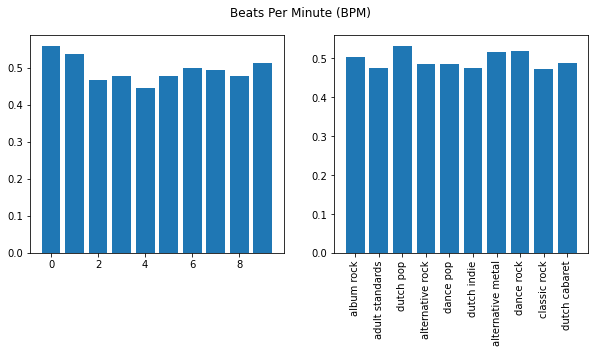

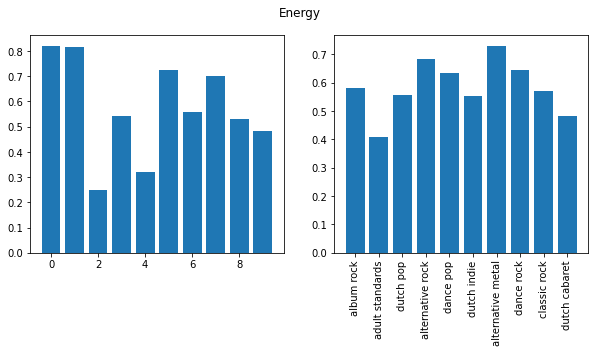

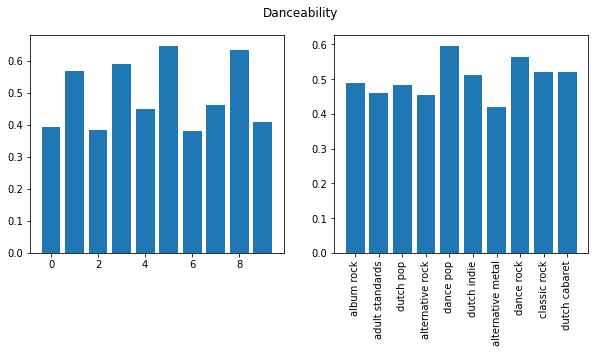

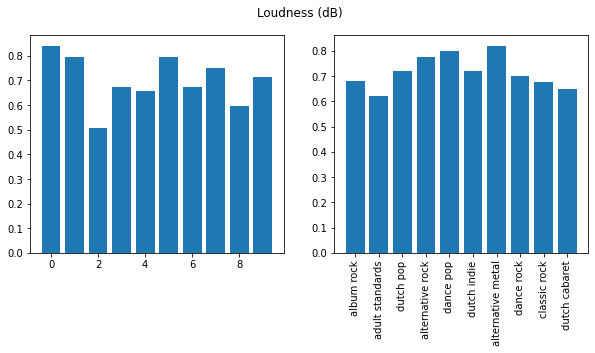

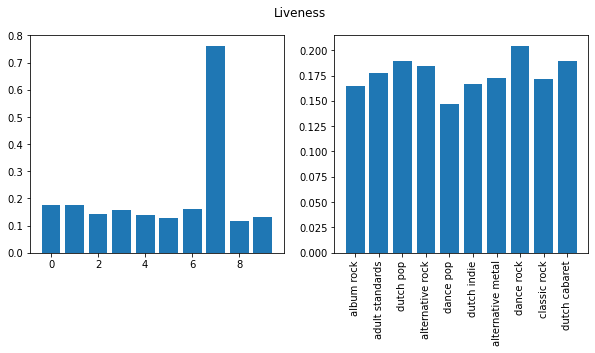

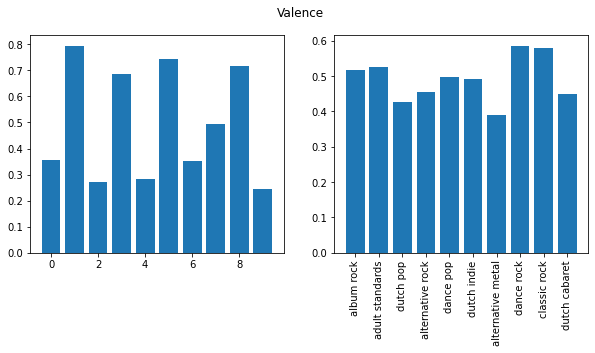

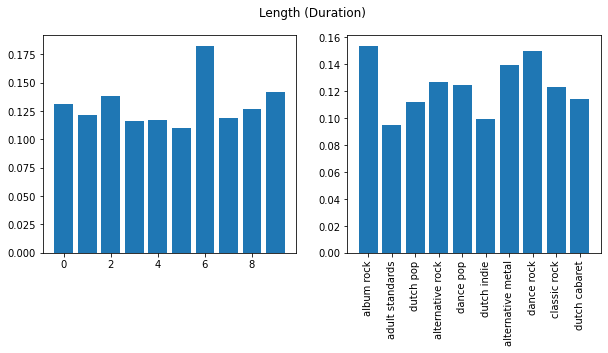

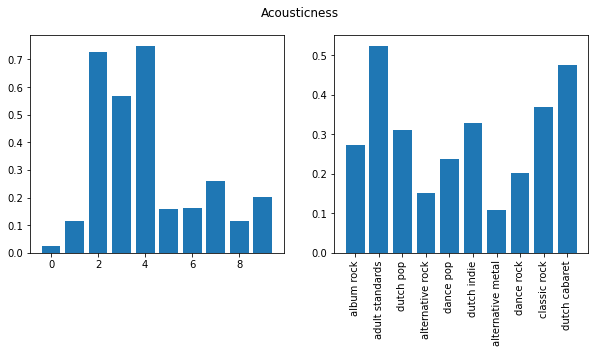

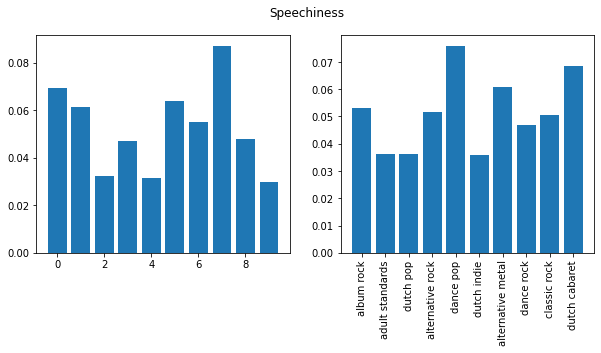

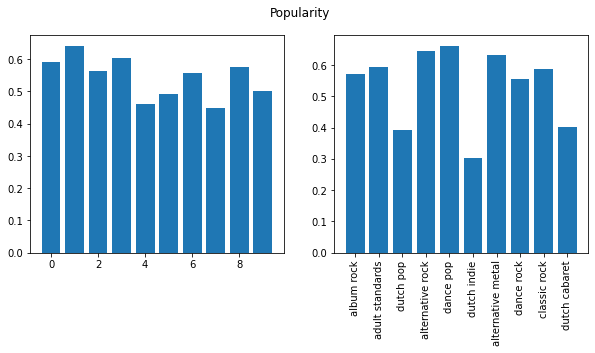

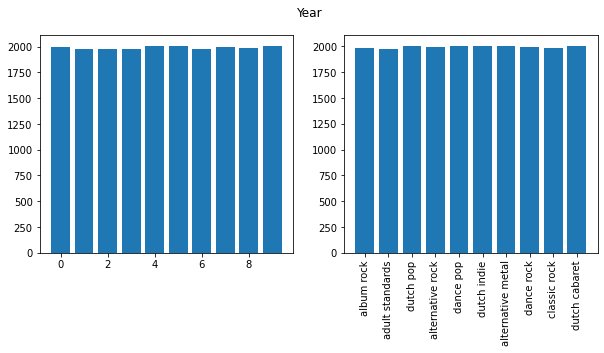

In [ ]:
#Compare cluster and genre labels across each feature

top_genres = df_display['Genre'].value_counts()[0:10,].index.values
top_df = df_display[df_display['Genre'].isin(top_genres)]

clusters = list(range(0, 10))
for column in columns_to_standardize:
  cluster_data = []
  for i in clusters:
    value = top_df[top_df['Cluster'] == i][column].mean()
    cluster_data.append(value)
  genre_data = []
  for i in top_genres:
    value = top_df[top_df['Genre'] == i][column].mean()
    genre_data.append(value)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  fig.suptitle(column)
  ax1.bar(clusters, cluster_data)
  ax2.bar(top_genres,genre_data)
  plt.xticks(rotation=90)



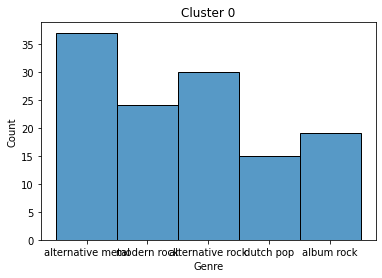

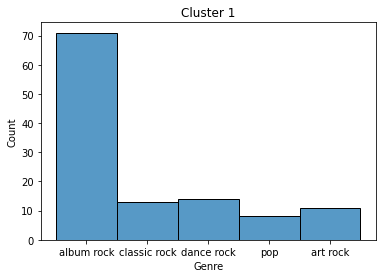

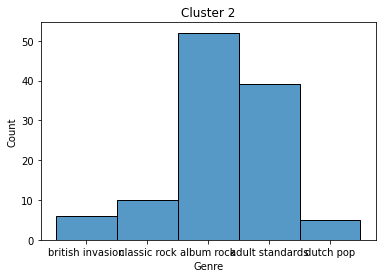

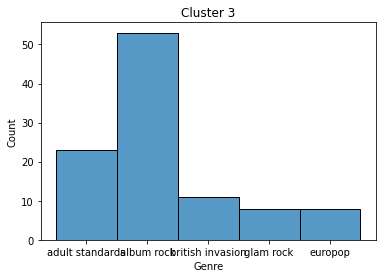

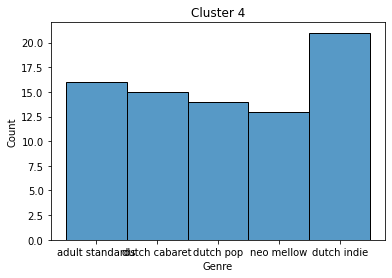

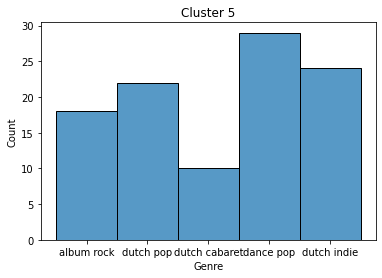

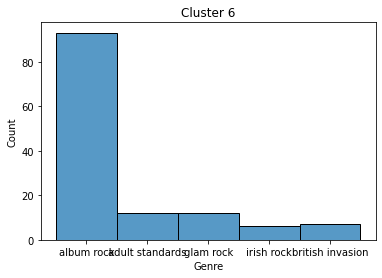

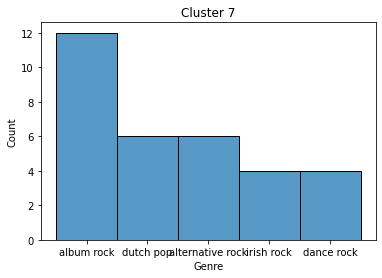

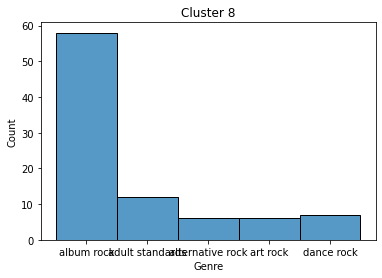

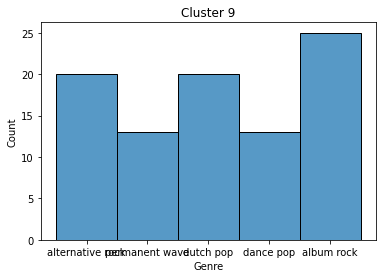

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot the most popular genres in each cluster
for i in range(0, 10):
  cluster_data = df_display[df_display['Cluster'] == i]
  top_genres = cluster_data['Genre'].value_counts()[0:5,].index.values
  top_data = cluster_data[cluster_data['Genre'].isin(top_genres)]
  sns.histplot(x=top_data['Genre'])
  plt.title('Cluster ' + str(i))
  plt.figure()

In [ ]:
#Use dimensionality reduction to reduce the dataset to only two dimensions for graphing purposes
from sklearn.manifold import TSNE

graph_df = df_display.copy()

top_genres = df_display['Genre'].value_counts()[0:10,].index.values
graph_df = df_display[df_display['Genre'].isin(top_genres)]

x_embedded = TSNE(n_components=2, random_state=7).fit_transform(graph_df.drop(['Genre', 'Cluster'], axis=1))

Text(0.5, 1.0, 'Top Spotify Songs By K-Means Cluster')

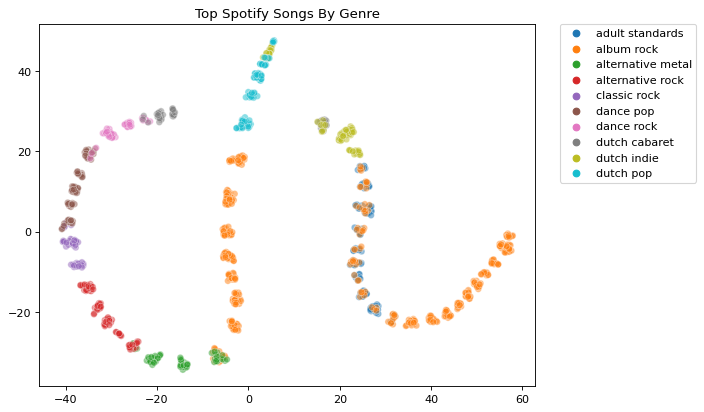

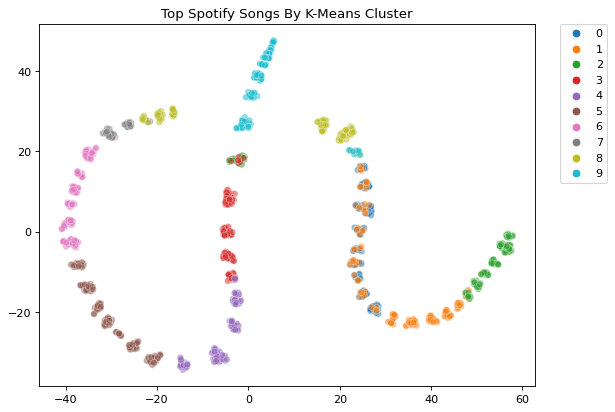

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x=x_embedded[:, 0], y=x_embedded[:,1], hue=graph_df.sort_values('Genre')['Genre'], legend='full', alpha=.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Top Spotify Songs By Genre')

plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x=x_embedded[:, 0], y=x_embedded[:,1], hue=graph_df.sort_values('Cluster')['Cluster'].astype(str), legend='full', alpha=.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Top Spotify Songs By K-Means Cluster')